In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def h(z, a, b, w, t):
    return np.exp(-1j * a * z) * np.exp(-b * z) * np.exp(1j * w * t)

T = 1.0
w = 2 * np.pi / T 
sigma = 1e-2
mu = np.pi * 4e-7

kk = np.sqrt(w * mu * sigma / 2)
a = kk
b = kk
zair = np.arange(start=-10000, stop=0, step=100)
zz = np.arange(start=0, stop=6e4, step=600)
tau = 1.0 / kk

In [ ]:

fig, ax = plt.subplots(figsize=(4, 6), layout='constrained')

def update(frame):
    ax.clear()
    t = frame * T / 100.0
    ax.plot([np.real(np.exp(1j * w * t)) for _ in zair], zair, color='blue', label='', zorder=1)
    ax.plot([np.real(h(z, a, b, w, t)) for z in zz], zz, color='blue', label='Re', zorder=2)
    ax.plot([np.imag(h(z, a, b, w, t)) for z in zz], zz, label='Im', zorder=3)
    ax.fill_betweenx(zz, -np.exp(-b * zz), np.exp(-b * zz), color='grey', alpha=0.5, label='')
    zp = w * t / a if a > 0.0 else np.max(zz) + w * t / a
    ax.scatter(np.real(h(zp, a, b, w, t)), zp, marker='*', color='black', label='phase')
    ax.axhline(y=tau, color='red', label='τ')
    ax.axhline(y=2 * np.pi * tau, color='green', label='λ')
    ax.set_ylabel('Depth in km')
    ax.set_xlabel('Normalized amplitude')
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(min(zair), max(zz))
    ax.invert_yaxis()
    ax.legend(loc='lower left')

ani = FuncAnimation(fig, update, frames=100, interval=50)

ani.save('animation.gif')

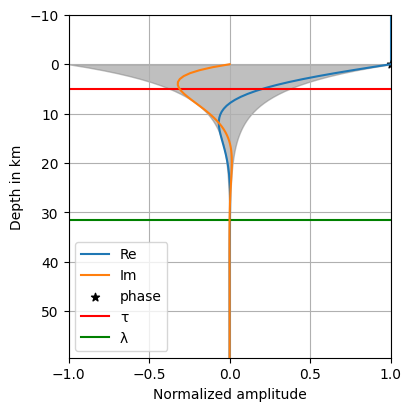

In [4]:
fig, ax = plt.subplots(figsize=(4, 4), layout='constrained')
t = 0
hsub = h(zz, a, b, w, t)
hr, = ax.plot(np.real(hsub), zz/1000, label='Re', zorder=2)
hi, = ax.plot(np.imag(hsub), zz/1000, label='Im', zorder=3)
hair = np.ones_like(zair) * np.exp(1j * w * t)
ha, = ax.plot(np.real(hair), zair/1000, color='C0', label='', zorder=1)
ax.fill_betweenx(zz/1000, -np.exp(-b * zz), np.exp(-b * zz), color='grey', alpha=0.5, label='')
zp = w * t / a if a > 0.0 else np.max(zz) + w * t / a
st = ax.scatter(np.real(h(zp, a, b, w, t)), zp/1000, marker='*', color='black', label='phase')
ax.axhline(y=tau/1000, color='red', label='τ')
ax.axhline(y=2*np.pi*tau/1000, color='green', label='λ')
ax.set_ylabel('Depth in km')
ax.set_xlabel('Normalized amplitude')
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(min(zair)/1000, max(zz)/1000)
ax.invert_yaxis()
ax.grid()
ax.legend(loc='lower left')

def update(frame):
    t = frame * T / 100.0
    hsub = h(zz, a, b, w, t)
    hr.set_xdata(hsub.real)
    hi.set_xdata(hsub.imag)
    hair = np.ones_like(zair) * np.exp(1j * w * t)
    ha.set_xdata(hair.real)

ani = FuncAnimation(fig, update, frames=100, interval=50)


In [5]:
ani.save('animation.gif')